In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_labels_df.pkl"))

In [3]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are not contains 'DVA' in their name or config.MOVIE
features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

# Change the names of the features to be more readable-
# remove the suffix '_Pre'
features_df.columns = [col.replace('_Pre', '') for col in features_df.columns]
# Take all the features that start with 'DVA', and add the suffix '_Distance' to them
features_df.columns = [col + '_Distance' if col.startswith('DVA') else col for col in features_df.columns]
features_df.columns = [col.replace('DVA_', '') for col in features_df.columns]

features_df.head()

,Movie,Mean_Gaze_Distance,Median_Gaze_Distance,Std_Gaze_Distance,Max_Gaze_Distance,Min_Gaze_Distance,Sem_Gaze_Distance,AUC_Gaze_Distance,Mean_Fixations_Distance,Median_Fixations_Distance,Std_Fixations_Distance,Max_Fixations_Distance,Min_Fixations_Distance,Sem_Fixations_Distance,AUC_Fixations_Distance
0,55,-0.005378,0.075885,-0.274688,-0.187566,0.765201,-0.284345,0.021187,-0.134361,-0.177465,0.082711,-0.195795,0.090953,0.714645,-0.916228
1,11,0.055352,0.04381,0.177709,0.049764,-0.055706,0.187483,0.032489,0.021737,0.035584,0.121065,0.012104,-0.048019,0.121065,0.021737
2,52,0.030675,-0.195128,-0.423989,0.205739,0.546411,-0.40149,-0.044459,-0.049165,-0.21364,-0.109698,0.063504,-0.736888,-0.153154,0.048455
3,14,-0.047398,-0.116447,-0.040024,-0.021405,-0.006866,-0.044159,-0.039139,-0.008956,-0.078866,-0.103936,-0.009232,-0.108607,-0.116128,0.018235
4,3,-0.029019,-0.041569,-0.411978,-0.057613,0.590878,-0.412841,-0.026164,-0.072849,-0.06515,-0.183358,-0.048098,0.330922,-0.042402,-0.325708


In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Movie                      4080 non-null   int8  
 1   Mean_Gaze_Distance         3864 non-null   object
 2   Median_Gaze_Distance       3864 non-null   object
 3   Std_Gaze_Distance          3864 non-null   object
 4   Max_Gaze_Distance          3864 non-null   object
 5   Min_Gaze_Distance          3864 non-null   object
 6   Sem_Gaze_Distance          3864 non-null   object
 7   AUC_Gaze_Distance          3864 non-null   object
 8   Mean_Fixations_Distance    4068 non-null   object
 9   Median_Fixations_Distance  4068 non-null   object
 10  Std_Fixations_Distance     4056 non-null   object
 11  Max_Fixations_Distance     4068 non-null   object
 12  Min_Fixations_Distance     4068 non-null   object
 13  Sem_Fixations_Distance     4056 non-null   object
 14  AUC_Fixa

In [5]:
labels_df.head()

,normalized_by_session_a
series_id,
0,1
1,1
2,1
3,0
4,0


In [6]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4079
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   normalized_by_session_a  4080 non-null   int64
dtypes: int64(1)
memory usage: 63.8 KB


Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [7]:
print('Number of missing values in each column:', features_df.isin([np.nan, np.inf, -np.inf]).sum(axis=0).sort_values(ascending=False).head(10))

Number of missing values in each column: Mean_Gaze_Distance         216
Median_Gaze_Distance       216
Std_Gaze_Distance          216
Max_Gaze_Distance          216
Min_Gaze_Distance          216
Sem_Gaze_Distance          216
AUC_Gaze_Distance          216
Std_Fixations_Distance      24
Sem_Fixations_Distance      24
Mean_Fixations_Distance     12
dtype: int64


Remove columns with more than 30% missing values or inf values

In [8]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [9]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Mean_Gaze_Distance         0.052941
Median_Gaze_Distance       0.052941
Std_Gaze_Distance          0.052941
Max_Gaze_Distance          0.052941
Min_Gaze_Distance          0.052941
Sem_Gaze_Distance          0.052941
AUC_Gaze_Distance          0.052941
Std_Fixations_Distance     0.005882
Sem_Fixations_Distance     0.005882
Mean_Fixations_Distance    0.002941
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [10]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

4011    0.933333
3663    0.933333
941     0.933333
1795    0.933333
504     0.933333
1354    0.933333
2243    0.933333
3066    0.933333
1307    0.933333
1018    0.933333
dtype: float64

Remove rows with more than 50% missing values

In [11]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [12]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

1925    0.466667
918     0.466667
2701    0.466667
1668    0.466667
476     0.466667
2704    0.466667
211     0.466667
3378    0.466667
2482    0.466667
3634    0.466667
dtype: float64

Subject-wise or leave-one-subject-out (LOSO) cross-validation

Leave-One-Subject-Out Cross-Validation (LOSO CV):
- For each fold of the cross-validation, data from N-1 participants are used for training, and the data from the remaining participant is used for testing.
- This process is repeated N times (for each participant), ensuring that each participant's data is used as a test set exactly once.
- This method ensures that the model generalizes well across different participants.

In [13]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_series_id_df.pkl"))

# remove the corresponding rows from y_train
series_id_df = series_id_df.loc[series_id_df.index.isin(features_df.index)]

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Order the list of subject IDs alphabetically
subject_ids = np.sort(subject_ids)

# Create groups of subject IDs
groups = series_id_df[config.SUBJECT].values

# Print the groups
print(groups)

['MN37' 'MA40' 'ZW57' ... 'KR13' 'HB81' 'DK47']


In [14]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
def logistic_regression_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 15)
    PENALTY = ['l1', 'l2']
    SOLVER = ['liblinear', 'saga']
    
    LR_PARAM_GRID  = {
        'C': C,
        'penalty': PENALTY,
        'solver': SOLVER
    }
    
    return GridSearchCV(estimator=LogisticRegression(), param_grid=LR_PARAM_GRID, verbose=0)


In [16]:
# Gradient Boosting:

def gradient_boosting_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 4)
    N_ESTIMATORS = range(100, 150, 5)
    
    GB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=GB_PARAM_GRID, verbose=0)

In [17]:
# SVM:

def svm_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 10)
    KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
    GAMMA = ['scale', 'auto']
    
    SVM_PARAM_GRID  = {
        'C': C,
        'kernel': KERNEL,
        'gamma': GAMMA
    }
    
    return GridSearchCV(estimator=SVC(), param_grid=SVM_PARAM_GRID, verbose=0)

In [18]:
# Random Forest:

def random_forest_model_searcher():
    # Define the range of values for each hyperparameter
    N_ESTIMATORS = range(50, 140, 10)
    MAX_DEPTH = range(2, 5)
    MIN_SAMPLES_SPLIT = range(2, 4)
    MIN_SAMPLES_LEAF = range(1, 3)
    
    RF_PARAM_GRID  = {
        'n_estimators': N_ESTIMATORS,
        'max_depth': MAX_DEPTH,
        'min_samples_split': MIN_SAMPLES_SPLIT,
        'min_samples_leaf': MIN_SAMPLES_LEAF
    }
    
    return GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_PARAM_GRID, verbose=0)

In [19]:
# XGBoost model

def xgboost_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 5)
    N_ESTIMATORS = range(100, 150, 5)
    
    XGB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=XGBClassifier(), param_grid=XGB_PARAM_GRID, verbose=0)

In [20]:
classifiers = {
    # 'SVM': svm_model_searcher(),
    # 'Gradient Boosting': gradient_boosting_model_searcher(),
    # 'Random Forest': random_forest_model_searcher(),
    # 'Logistic Regression': logistic_regression_model_searcher(),
    'XGBoost': xgboost_model_searcher()
}

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()
    
    return confusion_mat

XGBoost on AI09
Accuracy: 0.55
Precision: 0.55
Recall: 0.57
F1-score: 0.56
ROC-AUC score: 0.55


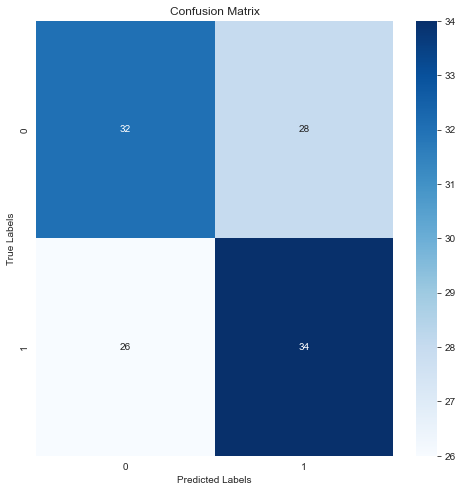

XGBoost on AJ31
Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1-score: 0.68
ROC-AUC score: 0.68


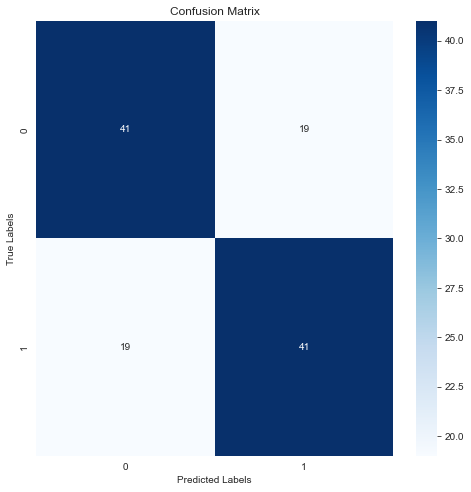

XGBoost on AM45
Accuracy: 0.81
Precision: 0.8
Recall: 0.82
F1-score: 0.81
ROC-AUC score: 0.81


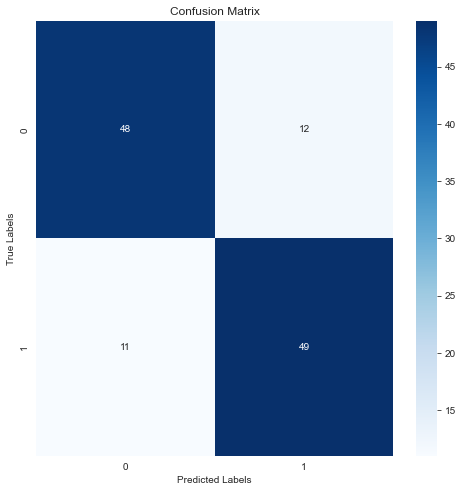

XGBoost on AS20
Accuracy: 0.82
Precision: 0.82
Recall: 0.83
F1-score: 0.83
ROC-AUC score: 0.82


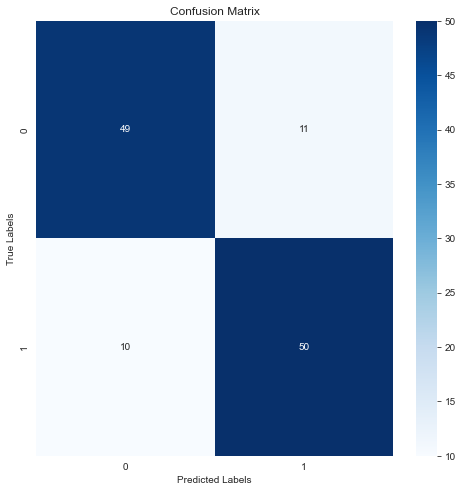

XGBoost on BB30
Accuracy: 0.44
Precision: 0.44
Recall: 0.45
F1-score: 0.45
ROC-AUC score: 0.44


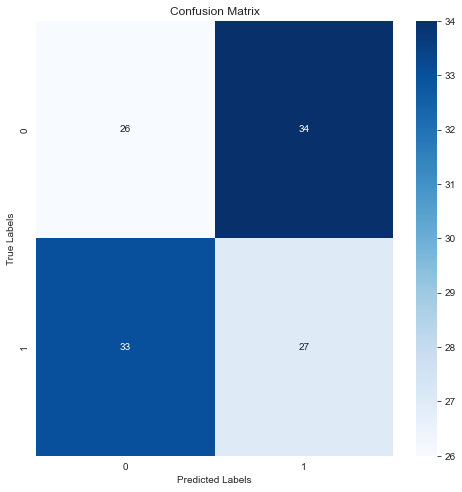

XGBoost on BG97
Accuracy: 0.48
Precision: 0.47
Recall: 0.47
F1-score: 0.47
ROC-AUC score: 0.48


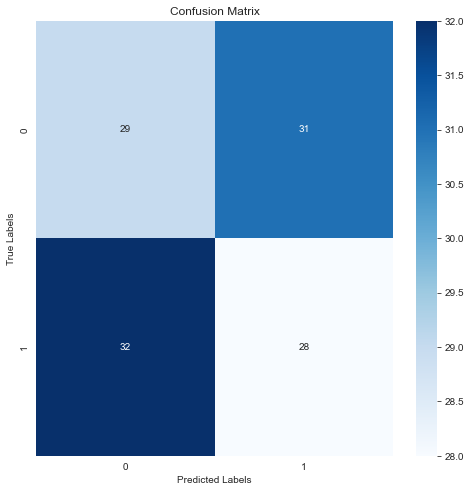

XGBoost on BH27
Accuracy: 0.67
Precision: 0.67
Recall: 0.65
F1-score: 0.66
ROC-AUC score: 0.67


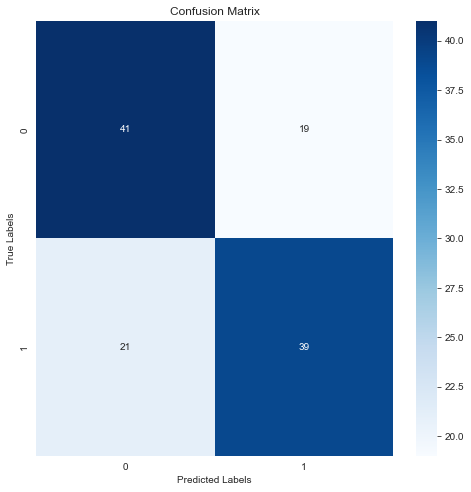

XGBoost on BO03
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82
ROC-AUC score: 0.82


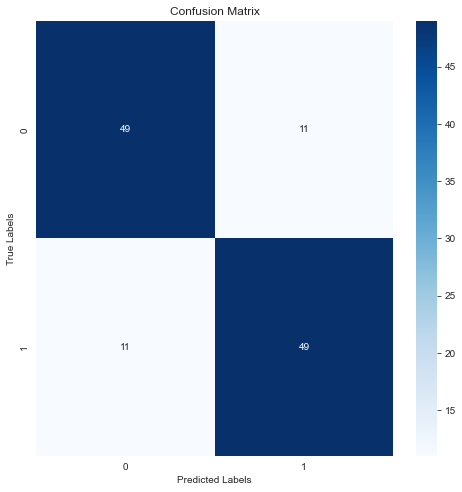

XGBoost on CR06
Accuracy: 0.82
Precision: 0.83
Recall: 0.82
F1-score: 0.82
ROC-AUC score: 0.82


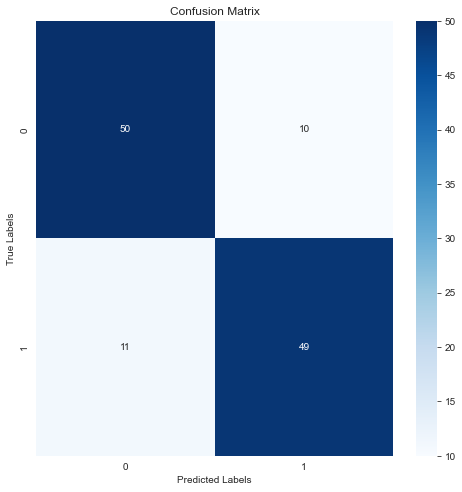

XGBoost on DK47
Accuracy: 0.69
Precision: 0.69
Recall: 0.68
F1-score: 0.69
ROC-AUC score: 0.69


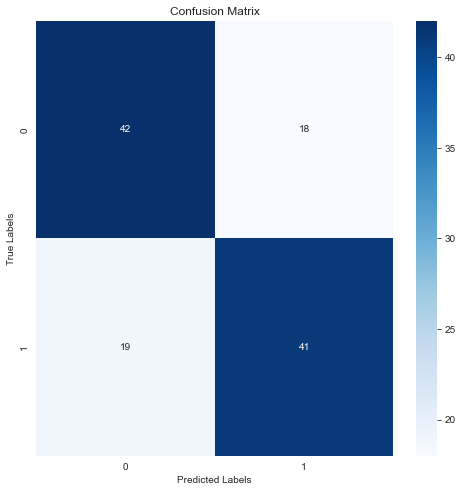

XGBoost on FY25
Accuracy: 0.65
Precision: 0.65
Recall: 0.67
F1-score: 0.66
ROC-AUC score: 0.65


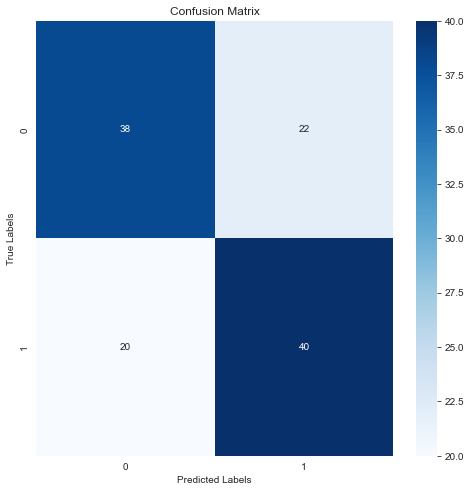

XGBoost on GE44
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1-score: 0.77
ROC-AUC score: 0.77


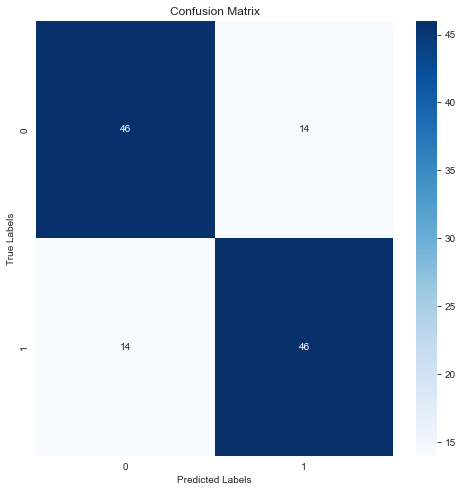

XGBoost on GN10
Accuracy: 0.71
Precision: 0.71
Recall: 0.7
F1-score: 0.71
ROC-AUC score: 0.71


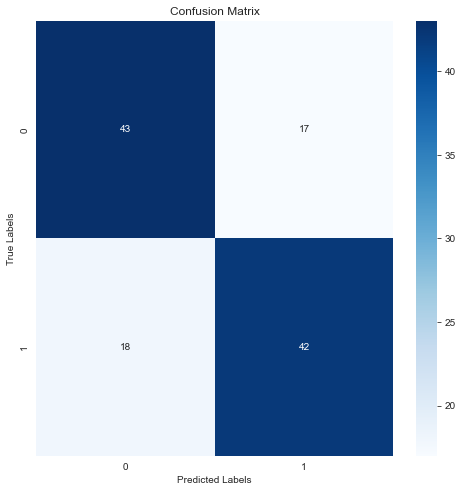

XGBoost on HB81
Accuracy: 0.71
Precision: 0.71
Recall: 0.7
F1-score: 0.71
ROC-AUC score: 0.71


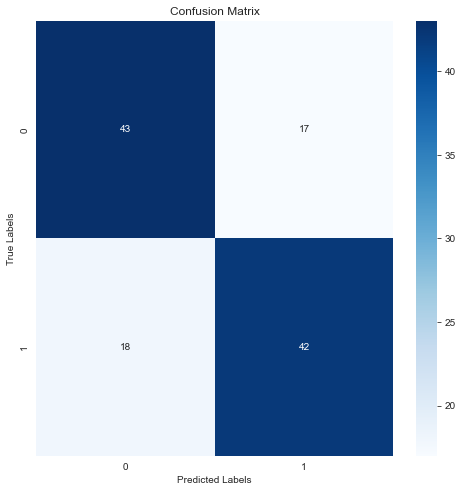

XGBoost on HM02
Accuracy: 0.66
Precision: 0.66
Recall: 0.67
F1-score: 0.66
ROC-AUC score: 0.66


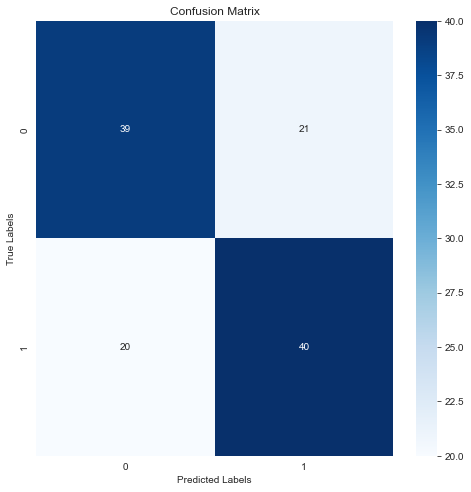

XGBoost on HR58
Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1-score: 0.9
ROC-AUC score: 0.9


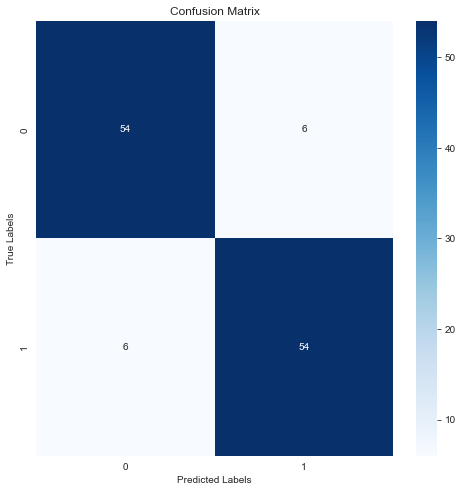

XGBoost on KL89
Accuracy: 0.54
Precision: 0.54
Recall: 0.55
F1-score: 0.55
ROC-AUC score: 0.54


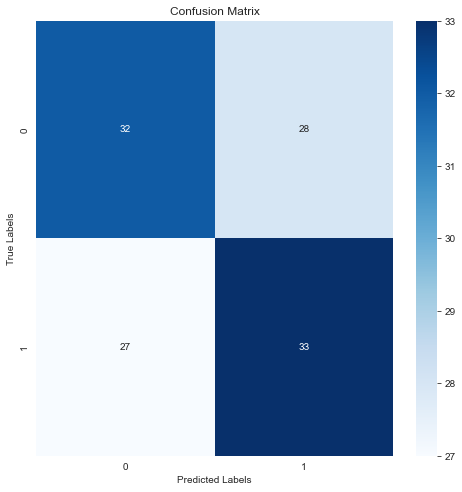

XGBoost on KM28
Accuracy: 0.66
Precision: 0.66
Recall: 0.67
F1-score: 0.66
ROC-AUC score: 0.66


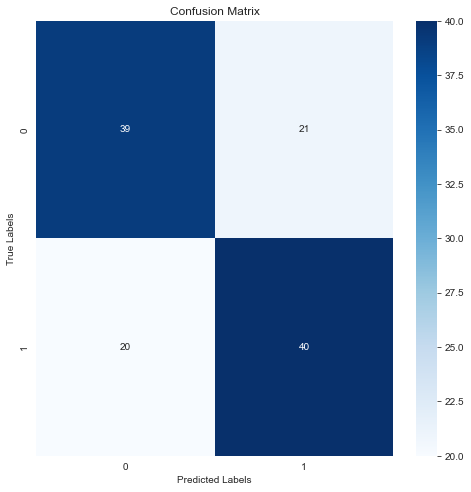

XGBoost on KR13
Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1-score: 0.68
ROC-AUC score: 0.68


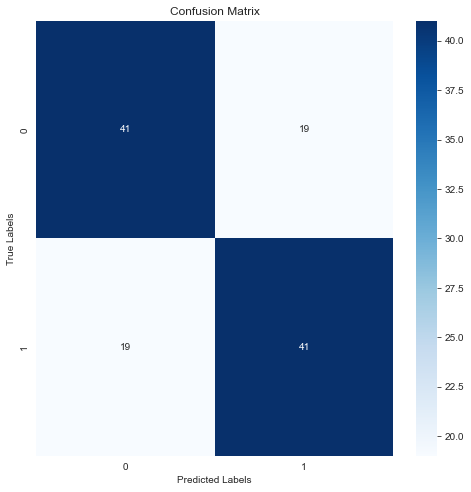

XGBoost on MA40
Accuracy: 0.67
Precision: 0.66
Recall: 0.68
F1-score: 0.67
ROC-AUC score: 0.67


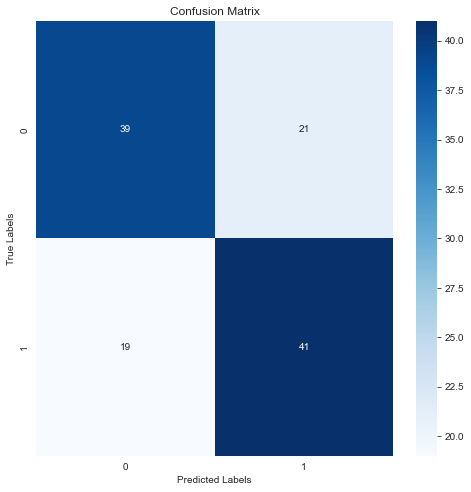

XGBoost on MN01
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-score: 0.76
ROC-AUC score: 0.76


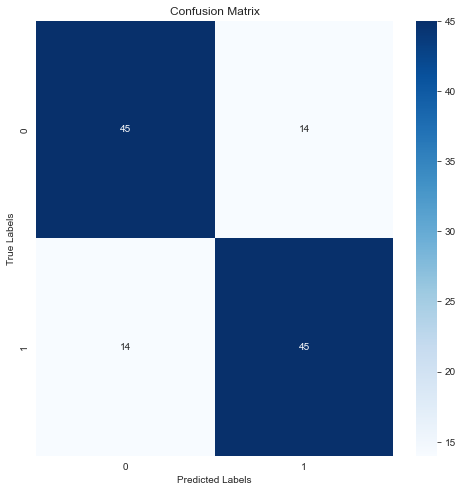

XGBoost on MN37
Accuracy: 0.64
Precision: 0.64
Recall: 0.65
F1-score: 0.64
ROC-AUC score: 0.64


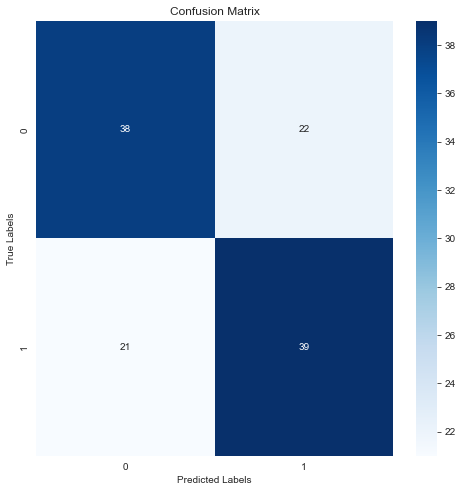

XGBoost on NN81
Accuracy: 0.86
Precision: 0.86
Recall: 0.85
F1-score: 0.86
ROC-AUC score: 0.86


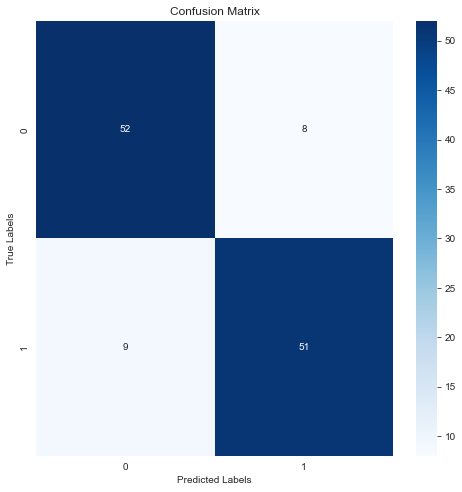

XGBoost on NY90
Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1-score: 0.78
ROC-AUC score: 0.77


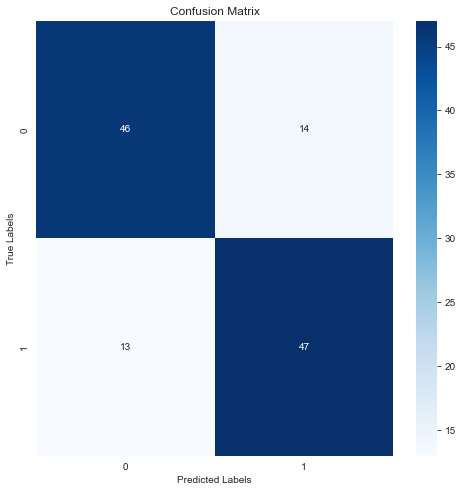

XGBoost on PM15
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-score: 0.87
ROC-AUC score: 0.87


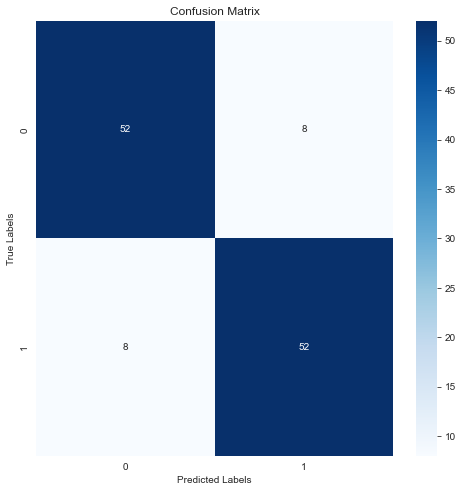

XGBoost on PS08
Accuracy: 0.48
Precision: 0.48
Recall: 0.48
F1-score: 0.48
ROC-AUC score: 0.48


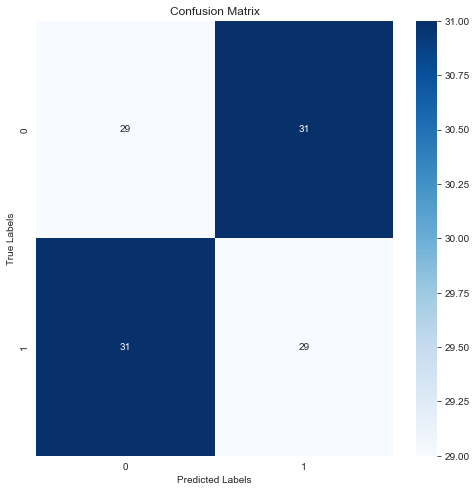

XGBoost on RN85
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-score: 0.93
ROC-AUC score: 0.93


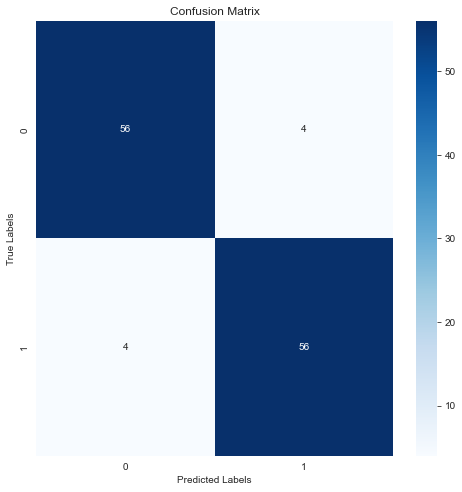

XGBoost on RS30
Accuracy: 0.71
Precision: 0.71
Recall: 0.7
F1-score: 0.71
ROC-AUC score: 0.71


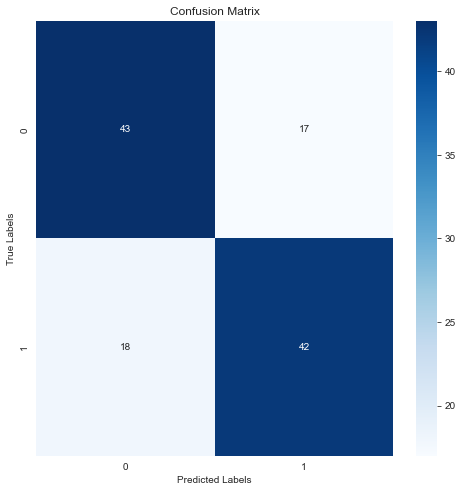

XGBoost on RY20
Accuracy: 0.52
Precision: 0.52
Recall: 0.52
F1-score: 0.52
ROC-AUC score: 0.52


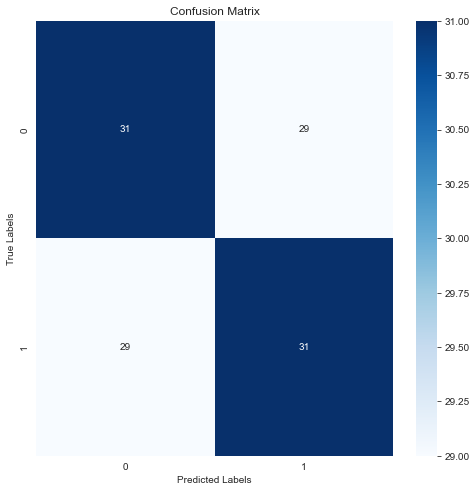

XGBoost on SM28
Accuracy: 0.45
Precision: 0.45
Recall: 0.45
F1-score: 0.45
ROC-AUC score: 0.45


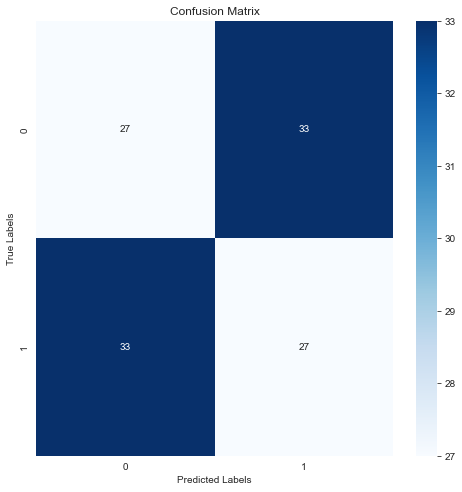

XGBoost on TA01
Accuracy: 0.65
Precision: 0.66
Recall: 0.64
F1-score: 0.65
ROC-AUC score: 0.65


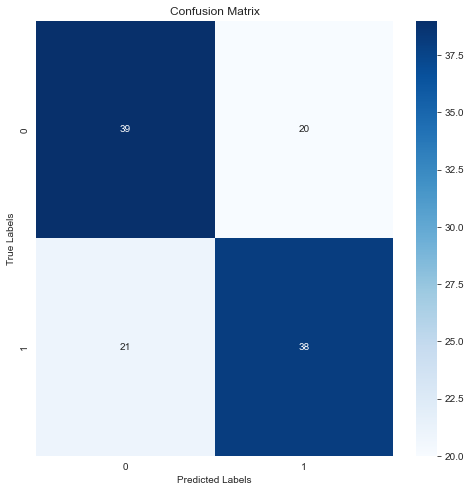

XGBoost on WE10
Accuracy: 0.72
Precision: 0.71
Recall: 0.75
F1-score: 0.73
ROC-AUC score: 0.72


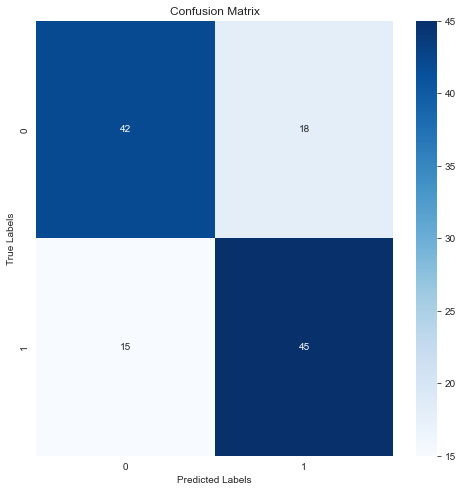

XGBoost on ZN05
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.73
ROC-AUC score: 0.73


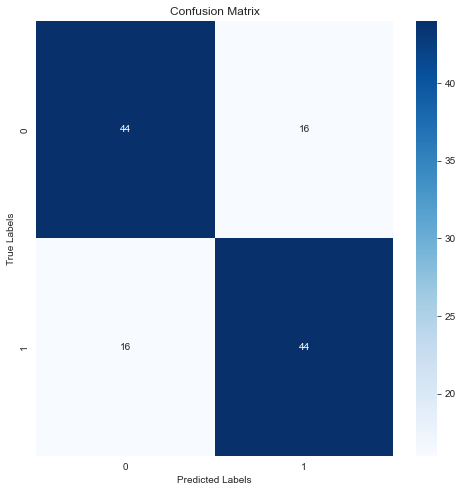

XGBoost on ZW57
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-score: 0.76
ROC-AUC score: 0.76


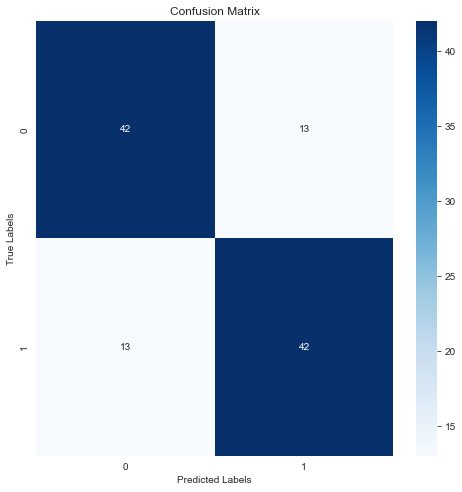

Average accuracy of XGBoost: 0.6940
Average confusion matrix of XGBoost: [[41.38235294 18.41176471]
 [18.20588235 41.58823529]]

The best classifier is: XGBoost with accuracy: 0.6940


In [22]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize LeaveOneSubjectOut cross-validator
logo = LeaveOneGroupOut()

# Function to perform LOSO CV and return average accuracy
def evaluate_classifier(model_searcher, X, y, groups, name):
    accuracies = {}
    confusion_matricies = {}
    confidence_intervals = {}
    models = {}
    roc_auc_curves = {}

    for train_index, test_index in logo.split(X, y, groups):
        # Extract indices for training and testing data for each participant
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fill inf values with the mean of the column
        X_train = X_train.replace([np.inf, -np.inf], np.nan)
        X_test = X_test.replace([np.inf, -np.inf], np.nan)
        X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
        X_test = X_test.fillna(X_train.mean())

        # Scale the data
        # Create separate StandardScaler instances
        scaler_x = StandardScaler()
        # Fit on Training Data (!)
        scaler_x.fit(X_train.values)
        # Transform both training and testing data
        X_train_scaled = scaler_x.transform(X_train.values)
        X_test_scaled = scaler_x.transform(X_test.values)
        y_train = y_train.values.reshape(-1, 1).flatten()
        y_test = y_test.values.reshape(-1, 1).flatten()
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        model_searcher.fit(X_train_scaled, y_train)
        clf = model_searcher.best_estimator_

        # Fit the classifier
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        # Store the results for this fold using subject name as key
        subject_name = groups[test_index[0]]
        accuracies[subject_name] = acc
        conf_mat = evaluate_model(f"{name} on {subject_name}", y_test, y_pred)
        confusion_matricies[subject_name] = conf_mat
        models[subject_name] = clf
        confidence_intervals[subject_name] = (acc - 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)), acc + 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)))
        roc_auc_curves[subject_name] = y_test, clf.predict_proba(X_test_scaled)[:, 1]

    # return all the computed dictionaries
    return accuracies, confusion_matricies, confidence_intervals, models, roc_auc_curves

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    acc, confusion_matricies, confidence_intervals, models, roc_auc_curves = evaluate_classifier(clf, features_df, labels_df, groups, name)
    avg_confusion_matrix = np.mean(list(confusion_matricies.values()), axis=0)
    avg_acc = np.mean(list(acc.values())) 

    results[name] = avg_acc, avg_confusion_matrix, acc, confusion_matricies, confidence_intervals, models, roc_auc_curves
    print(f"Average accuracy of {name}: {avg_acc:.4f}")
    print(f"Average confusion matrix of {name}: {avg_confusion_matrix}")

# Decision-making (choose the classifier with the highest average accuracy)
best_classifier_name = max(results, key=lambda k: results[k][0])
print(f"\nThe best classifier is: {best_classifier_name} with accuracy: {results[best_classifier_name][0]:.4f}")

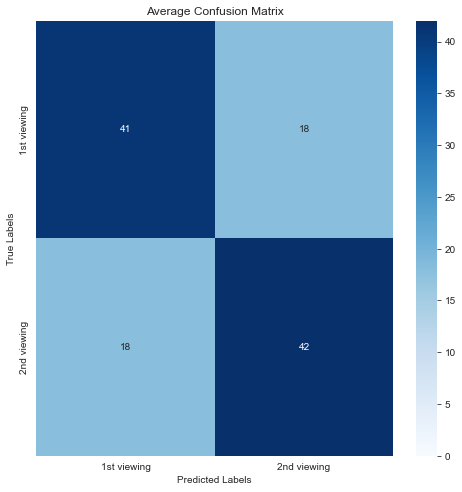

In [23]:
# Plot the average confusion matrix
# round the values in the confusion matrix
avg_confusion_matrix_round = np.round(results[best_classifier_name][1]).astype(int)

# Create a heatmap visualization of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
# the color range should start at 0 and end at the maximum value in the confusion matrix
sns.heatmap(avg_confusion_matrix_round, annot=True, cmap="Blues", fmt="d", ax=ax, vmin=0, vmax=np.max(avg_confusion_matrix_round))

# Set the axis values- replace 0 with 1st viewing and 1 with 2nd viewing
ax.set_xticklabels(['1st viewing', '2nd viewing'])
ax.set_yticklabels(['1st viewing', '2nd viewing'])

# Set the axis labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Average Confusion Matrix")

# Style
# Make the fonts visible in the plot
plt.rcParams.update({'font.size': 20})
# Make the tick labels of the heatmap visible
for tick in ax.get_xticklabels():
    tick.set_visible(True)
for tick in ax.get_yticklabels():
    tick.set_visible(True)
    
# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "confusion_matrix.svg"), bbox_inches='tight')

# Show the plot
plt.show()

Calculating Performance Across Participants (Subject-wise)

The Y-axis can represent the accuracy for each participant, i.e., the percentage of correct classifications. This is the most direct measure of classifier performance and would be readily interpretable by most readers. We can use error bars to represent confidence intervals for each participant's accuracy.

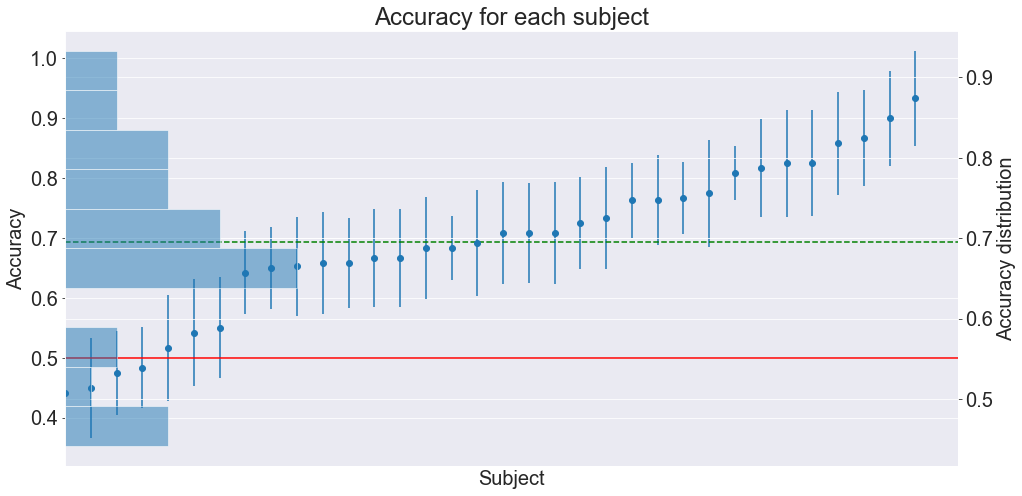

In [24]:
acc = results[best_classifier_name][2]
confidence_intervals = results[best_classifier_name][4]
avg_acc = results[best_classifier_name][0]

# Plot the accuracy for each participant with error bars representing 95% confidence intervals for each participant
fig, ax = plt.subplots(figsize=(16, 8))
# Sort the accuracies dictionary by value (accuracy) and plot the values
ax.errorbar(sorted(acc, key=acc.get), [acc[key] for key in sorted(acc, key=acc.get)], yerr=[(top - bot) / 2 for bot, top in confidence_intervals.values()], fmt='o')
ax.set_xlabel("Subject")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for each subject")
# remove the ticks from the x-axis
ax.set_xticks([])

# Add a horizontal dashed line representing the average accuracy across participants
ax.axhline(y=avg_acc, color='g', linestyle='--')
# Add horizontal lines representing the chance level accuracy (50%) and the perfect accuracy (100%)
ax.axhline(y=0.5, color='r', linestyle='-')
# Add acuracy distribution on the right side
ax2 = ax.twinx()
ax2.hist([acc[key] for key in sorted(acc, key=acc.get)], bins=10, alpha=0.5, orientation='horizontal')
ax2.set_ylabel("Accuracy distribution")
# Increase font size
plt.rcParams.update({'font.size': 25})
# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "accuracy_distribution.svg"), bbox_inches='tight')
# Show the plot
plt.show()

Calculating ROC AUC curves for each participant (fold)

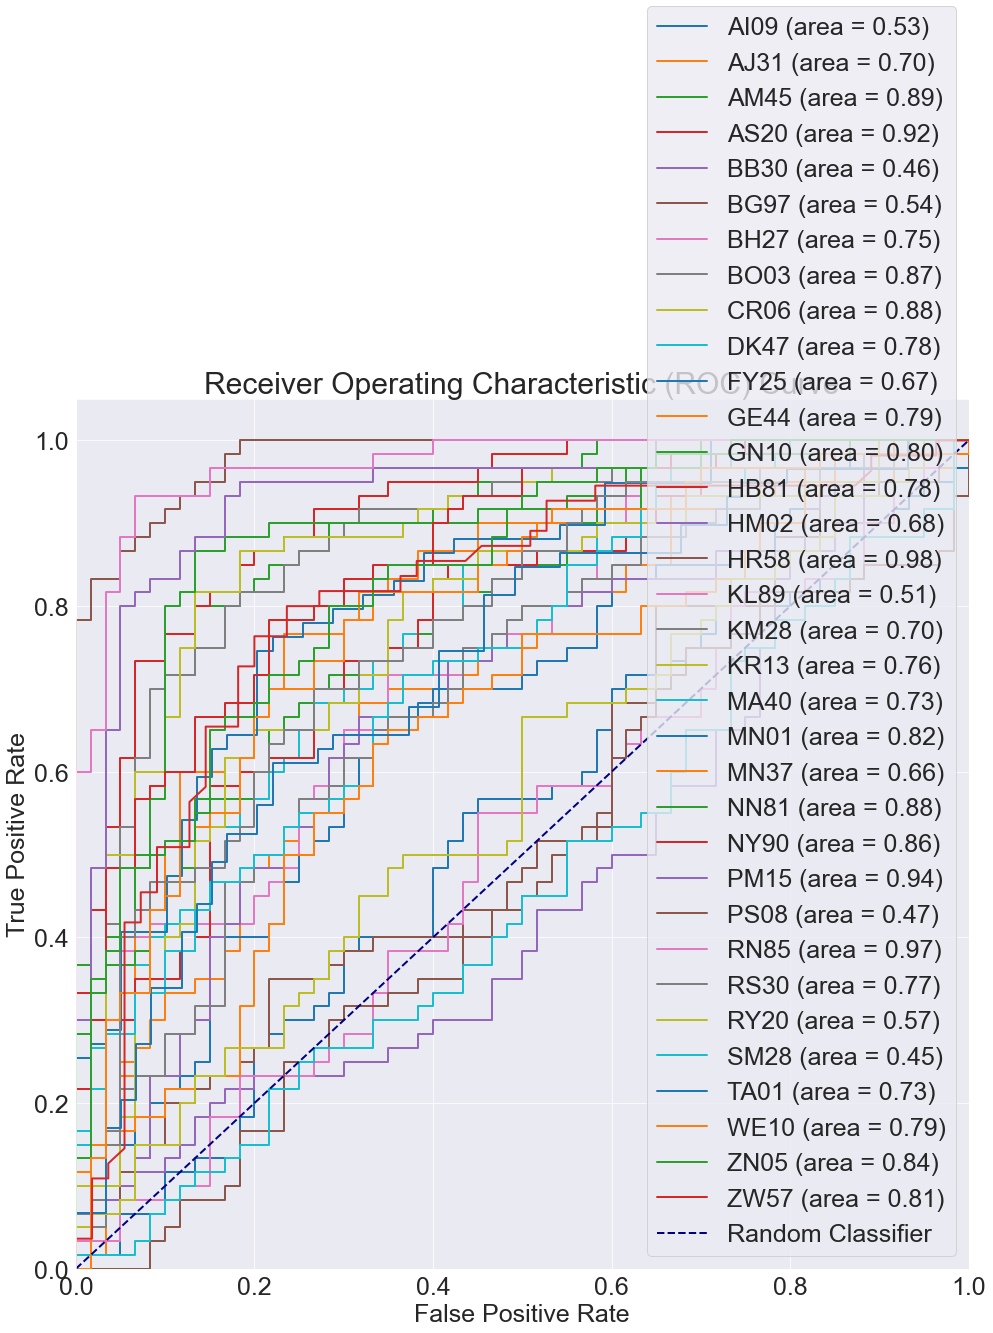

In [25]:
from sklearn.metrics import roc_curve, auc

roc_auc_curves = results[best_classifier_name][6]

# Plot ROC curve for each participant
fig, ax = plt.subplots(figsize=(16, 16))

# For each fold calculate ROC curve and ROC area
for subject_name, (y_test, y_pred) in roc_auc_curves.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    ax.plot(fpr, tpr, lw=2, label=f'{subject_name} (area = {roc_auc:.2f})')
    
# Plot ROC curve for random classifier
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
# Without legends
# ax.legend(loc="lower right")

# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "roc_auc.svg"), bbox_inches='tight')

# legend separately (outside the plot)
ax.legend(loc="lower right")
# Save the plot
plt.savefig(os.path.join(config.classification_resource_dir, "roc_auc_legend.svg"), bbox_inches='tight')

# Show the plot
plt.show()


Take the best model and train it on the whole dataset

The best model is SVM, so we will train it on the whole dataset, using the average hyperparameters from the LOSO CV

In [26]:
# Get the best model
best_model = results['SVM'][5]

# Go over all the models and average the hyperparameters
best_model_params = {}
for model in best_model.values():
    for param, value in model.get_params().items():
        # If parameter is numeric, add it to the dictionary
        if isinstance(value, (int, float)):
            # if the parameter is already in the dictionary, append the value to the list
            if param in best_model_params:
                best_model_params[param].append(value)
            else:
                best_model_params[param] = [value]
for param, value in best_model_params.items():
    best_model_params[param] = np.mean(value)
    
best_model_params

KeyError: 'SVM'

In [ ]:
# Train the best model on the whole dataset using the average hyperparameters
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill mis
# ing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# SVM
# Train final model with best hyperparameters
svm = SVC(C=0.547, gamma='scale', kernel='rbf')
svm.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm.predict_proba(X_train_scaled)[:, 1]
acc = accuracy_score(y_train, y_pred)  
conf_mat = evaluate_model(f"svm on whole dataset", y_train, y_pred)


Plot ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [ ]:
# Get the best model
best_model = results['XGBoost'][5]

# Go over all the models and average the hyperparameters
best_model_params = {}
for model in best_model.values():
    for param, value in model.get_params().items():
        # If parameter is numeric, add it to the dictionary
        if isinstance(value, (int, float)):
            # if the parameter is already in the dictionary, append the value to the list
            if param in best_model_params:
                best_model_params[param].append(value)
            else:
                best_model_params[param] = [value]
for param, value in best_model_params.items():
    best_model_params[param] = np.mean(value)
    
best_model_params

In [ ]:
# Train the best model on the whole dataset using the average hyperparameters
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# SVM
# Train final model with best hyperparameters
xgb = XGBClassifier(learning_rate=0.1128, max_depth=3, n_estimators=122)
xgb.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = xgb.predict_proba(X_train_scaled)[:, 1]
# acc = accuracy_score(y_train, y_pred)  
# conf_mat = evaluate_model(f"xgb on whole dataset", y_train, y_pred)


Plot ROC curve with many points

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

Feature importance and SHAP values for the best model

In [ ]:
import shap
import matplotlib.pyplot as plt

%matplotlib inline

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb)

# Calculate Shap values
shap_values = explainer.shap_values(X_train_scaled)

# Increase font size
plt.rcParams.update({'font.size': 30})

# # Plot summary plot (feature importance) with the top 5 features
# shap.summary_plot(shap_values, X_train_scaled, plot_type="bar", max_display=5)
# 
# # Plot summary plot with the top 8 features
# plt.figure(figsize=(8, 16))
# shap.summary_plot(shap_values, X_train_scaled, max_display=8)
# # Save the plot
# plt.savefig(os.path.join(config.classification_resource_dir, "shap_values.svg"))
# 
# plt.show()
# # Plot force plot with the top 5 features
# shap.force_plot(explainer.expected_value, shap_values, X_train_scaled)
# 
# # Plot pie plot with all features
# shap.summary_plot(shap_values, X_train_scaled)

# Plot dependence plot
shap.dependence_plot('Mean_Gaze_Distance', shap_values, X_train, interaction_index="Mean_Gaze_Distance")

In [ ]:
# # TabNetClassifier with automatic hyperparameters tuning
# !pip install pytorch-tabnet
# !pip install optuna

In [ ]:
# from pytorch_tabnet.tab_model import TabNetClassifier
# import optuna
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# 
# # Initialize LeaveOneSubjectOut cross-validator
# logo = LeaveOneGroupOut()
# 
# # Function to perform LOSO CV and return average accuracy
# def evaluate_tabnet(X, y, groups):
#     tabnet_accuracies = {}
#     tabnet_confusion_matricies = {}
#     tabnet_confidence_intervals = {}
#     tabnet_models = {}
# 
#     for train_index, test_index in logo.split(X, y, groups):
#         # Extract indices for training and testing data for each participant
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         
#         # fill inf values with the mean of the column
#         X_train = X_train.replace([np.inf, -np.inf], np.nan)
#         X_test = X_test.replace([np.inf, -np.inf], np.nan)
#         X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
#         X_test = X_test.fillna(X_train.mean())
#         
#         # Scale the data
#         # Create separate StandardScaler instances
#         scaler_x = StandardScaler()
#         # Fit on Training Data (!)
#         scaler_x.fit(X_train.values)
#         # Transform both training and testing data
#         X_train_scaled = scaler_x.transform(X_train.values)
#         X_test_scaled = scaler_x.transform(X_test.values)
#         y_train = y_train.values.reshape(-1, 1).flatten()
#         y_test = y_test.values.reshape(-1, 1).flatten()
#         X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#         X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
#         
#         # TABNET
#         # Convert Pandas DataFrame to NumPy array
#         X_train_np = X_train_scaled.values
#         X_test_np = X_test_scaled.values
#         
#         # Define objective function for optuna
#         def objective(trial):
#             # Generate hyperparameter search space
#             params = {
#                 'n_d': trial.suggest_int('n_d', 10, 50),
#                 'n_a': trial.suggest_int('n_a', 10, 50),
#                 'n_steps': trial.suggest_int('n_steps', 1, 19),
#                 'gamma': trial.suggest_float('gamma', 0.1, 2.0),
#                 'n_independent': trial.suggest_int('n_independent', 1, 10),
#                 'n_shared': trial.suggest_int('n_shared', 1, 10),
#                 'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
#                 'verbose': 0
#             }
#         
#             # Create TabNetClassifier object with hyperparameters from optuna
#             classifier = TabNetClassifier(**params)
#         
#             # Train and evaluate the model
#             classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
#             val_preds = classifier.predict_proba(X_test_np)[:, 1]
#             val_auc = roc_auc_score(y_test, val_preds)
#         
#             return val_auc
#         
#         # Create optuna study
#         study = optuna.create_study(direction='maximize')
#         
#         # Optimize hyperparameters using optuna
#         study.optimize(objective, n_trials=42, timeout=600)
#         
#         # Get best hyperparameters from optuna
#         best_params = study.best_trial.params
#         print('Best trial: score {},\nparams {}'.format(study.best_trial.value, study.best_trial.params))
#         
#         # Train final model with best hyperparameters
#         tabnet = TabNetClassifier(**best_params)
#         tabnet.fit(X_train_np, y_train)
# 
#         # Evaluate the model
#         y_pred = tabnet.predict(X_test_np)
#         acc = accuracy_score(y_test, y_pred)
#         
#         # Store the results for this fold using subject name as key
#         subject_name = groups[test_index[0]]
#         tabnet_accuracies[subject_name] = acc
#         conf_mat = evaluate_model(f"Tabnet on {subject_name}", y_test, y_pred)
#         tabnet_confusion_matricies[subject_name] = conf_mat
#         tabnet_models[subject_name] = tabnet
#         tabnet_confidence_intervals[subject_name] = (acc - 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)), acc + 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)))
#         
#     # return all the computed dictionaries
#     return tabnet_accuracies, tabnet_confusion_matricies, tabnet_confidence_intervals, tabnet_models
# 
# # Evaluate
# tabnet_acc, tabnet_confusion_matricies, tabnet_confidence_intervals, tabnet_models = evaluate_tabnet(features_df, labels_df, groups)
# 
# tabnet_avg_confusion_matrix = np.mean(list(tabnet_confusion_matricies.values()), axis=0)
# tabnet_avg_acc = np.mean(list(tabnet_acc.values())) 
# 
# print(f"Tabnet Average accuracy: {tabnet_avg_acc:.4f}")
# print(f"Tabnet   Average confusion matrix: {tabnet_avg_confusion_matrix}")

In [ ]:
# # Plot the average confusion matrix
# # round the values in the confusion matrix
# tabnet_avg_confusion_matrix_round = np.round(tabnet_avg_confusion_matrix).astype(int)
# 
# # Create a heatmap visualization of the confusion matrix 
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(tabnet_avg_confusion_matrix_round, annot=True, cmap="Blues", fmt="d", ax=ax)
# 
# # Set the axis labels and title
# ax.set_xlabel("Predicted Labels")
# ax.set_ylabel("True Labels")
# ax.set_title("Average Confusion Matrix")
# 
# # Show the plot
# plt.show()

Calculating Performance Across Participants (Subject-wise)

The Y-axis can represent the accuracy for each participant, i.e., the percentage of correct classifications. This is the most direct measure of classifier performance and would be readily interpretable by most readers. We can use error bars to represent confidence intervals for each participant's accuracy.

In [ ]:
# # Plot the accuracy for each participant with error bars representing 95% confidence intervals for each participant
# fig, ax = plt.subplots(figsize=(30, 8))
# ax.errorbar(tabnet_acc.keys(), tabnet_acc.values(), yerr=[(top - bot) / 2 for bot, top in tabnet_confidence_intervals.values()], fmt='o')
# ax.set_xlabel("Participant")
# ax.set_ylabel("Accuracy")
# ax.set_title("Accuracy for each participant with error bars representing 95% confidence intervals")
# # Add a horizontal dashed line representing the average accuracy across participants
# ax.axhline(y=tabnet_avg_acc, color='g', linestyle='--')
# # Add horizontal lines representing the chance level accuracy (50%)
# ax.axhline(y=0.5, color='r', linestyle='-')
# # Show the plot
# plt.show()

The best model is Tabnet, so we will train it on the whole dataset
and then we will plot the feature importance and the SHAP values

In [ ]:
# # Go over all the models and average the hyperparameters
# best_model_params = {}
# for model in tabnet_models.values():
#     for param, value in model.get_params().items():
#         # If parameter is numeric, add it to the dictionary
#         if isinstance(value, (int, float)):
#             # if the parameter is already in the dictionary, append the value to the list
#             if param in best_model_params:
#                 best_model_params[param].append(value)
#             else:
#                 best_model_params[param] = [value]
# for param, value in best_model_params.items():
#     best_model_params[param] = np.mean(value)
#     
# best_model_params

In [ ]:
# X_train = features_df
# y_train = labels_df
# 
# # fill inf values with the mean of the column
# X_train = X_train.replace([np.inf, -np.inf], np.nan)
# X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
# 
# # Scale the data
# # Create separate StandardScaler instances
# scaler_x = StandardScaler()
# # Fit on Training Data (!)
# scaler_x.fit(X_train.values)
# # Transform both training and testing data
# X_train_scaled = scaler_x.transform(X_train.values)
# y_train = y_train.values.reshape(-1, 1).flatten()
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# 
# # TABNET
# # Convert Pandas DataFrame to NumPy array
# X_train_np = X_train_scaled.values
# 
# 
# # Train final model with best hyperparameters
# all_training_model = TabNetClassifier(n_d=35, n_a=41, n_steps=10, gamma=0.85, n_independent=6, n_shared=5, lambda_sparse=0.0432, verbose=0)
# all_training_model.fit(X_train_np, y_train)
# 
# # Evaluate the model
# y_pred = all_training_model.predict(X_train_np)
# acc = accuracy_score(y_train, y_pred)
# conf_mat = evaluate_model(f"Tabnet on whole dataset", y_train, y_pred)

Feature importance

In [ ]:
# feature_importances = pd.DataFrame(all_training_model.feature_importances_,
#                                    index = X_train.columns,
#                                     columns=['importance']).sort_values('importance', ascending=False)
# feature_importances = feature_importances

More feature importance plots

In [ ]:
# # Plot feature importance
# feature_importances.plot.bar(figsize=(20, 8))
# plt.show()
# 
# # Plot feature importance
# feature_importances.plot.barh(figsize=(20, 8))
# plt.show()
# 
# # Plot feature importance
# feature_importances.plot.pie(figsize=(20, 20), subplots=True)
# plt.show()